In [1]:
#!python setup_ima.py 

In [2]:
#TODO: change the seed functions to use the estimation

In [3]:

from collections import Counter
from multiprocessing import Pool, cpu_count
from typing import Dict, List, Set

import networkx as nx
import matplotlib.pyplot as plt

from src.graph import (
    create_polarized_graph,
    create_polarized_graph_multiple,
    graph_loader,
    random_color_graph,
    spectral_bipartition_coloring,
    spectral_partition_coloring,
    color_from_file
)

from src.seed import (seed_degree, 
    seed_polarized, 
    seed_random, 
    seed_polarized_centrality_mixed, 
    seed_polarized_centrality, 
    seed_polarized_degree, 
    seed_centrality_mixed, 
    seed_centrality, 
    seed_influence_maximization
)

#from src.seed_ima import 



from evaluation import evaluate_all_seeds

In [4]:
import warnings

# Suppress the specific UserWarning from sklearn
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.manifold._spectral_embedding")

In [5]:
num_groups = 2

#G = create_polarized_graph_multiple(200, num_groups, 0.05, 0.01)
#G = graph_loader("datasets/facebook/facebook_combined.txt")
#G = graph_loader("datasets/twitter_social_cirlce/twitter_combined.txt")
#G = graph_loader('datasets/congress_network/congress.edgelist')
#G = graph_loader('datasets/Epinions/soc-Epinions1.txt')
G = graph_loader('datasets/soc-anybeat/soc-anybeat.edges')

#spectral_bipartition_coloring(G)
#spectral_partition_coloring(G, num_groups, "coloring_anybeat_num_group_2.txt")
#random_color_graph(G, num_groups)
color_from_file(G, "coloring_anybeat_num_group_2.txt")
colors = plt.cm.get_cmap('tab10', num_groups)  # Use 'tab10' colormap to get distinct colors
color_map = [colors(G.nodes[node]["color"]) for node in G.nodes()]
print(', '.join([f"Color {i+1}: {value}" for i, value in enumerate(list(Counter(color_map).values()))]))

Number of Nodes: 12645
Number of Edges: 67053
Color 1: 6322, Color 2: 6323


In [6]:
seed_size = G.number_of_nodes() // 20
print(f"Seed size: {seed_size}")
k = seed_size
max_iter = 1000
budget = 3 * seed_size

Seed size: 632


In [7]:
# Define your seed functions
seed_functions = {
    "Random": seed_random,
    "MIA": lambda G, seed_size: seed_influence_maximization(G, seed_size, 200, 8, 1),
    "Degree": seed_degree,
    "Centrality": seed_centrality,
    "Centrality Mixed": seed_centrality_mixed,
    "Polarized": lambda G, seed_size: seed_polarized(G, seed_size, 0),
    "Polarized Degree": lambda G, seed_size: seed_polarized_degree(G, seed_size, 0),
    "Polarized Centrality": lambda G, seed_size: seed_polarized_centrality(G, seed_size, 0),
    "Polarized Centrality Mixed": lambda G, seed_size: seed_polarized_centrality_mixed(G, seed_size, 0),
}
 
# Example of how to call the function
all_results_df = evaluate_all_seeds(G, seed_functions, seed_size, k, max_iter, budget)

# Display the combined results
print("Combined Results for All Seed Functions")
all_results_df

Running evaluation for seed function: Random
    Running evaluation for graph modification: Original Graph


100%|██████████| 1000/1000 [03:13<00:00,  5.15it/s]


    Running evaluation for graph modification: Random


100%|██████████| 1000/1000 [03:08<00:00,  5.31it/s]


    Running evaluation for graph modification: Degree


100%|██████████| 1000/1000 [03:13<00:00,  5.16it/s]


    Running evaluation for graph modification: PrefAtt


100%|██████████| 1000/1000 [03:11<00:00,  5.23it/s]


    Running evaluation for graph modification: Jaccard


100%|██████████| 1000/1000 [03:09<00:00,  5.27it/s]


    Running evaluation for graph modification: TopK


100%|██████████| 1000/1000 [03:09<00:00,  5.28it/s]


    Running evaluation for graph modification: KKT


100%|██████████| 1000/1000 [03:11<00:00,  5.23it/s]


    Running evaluation for graph modification: Custom


100%|██████████| 1000/1000 [03:06<00:00,  5.35it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 1000/1000 [03:06<00:00,  5.37it/s]


Running evaluation for seed function: MIA


Selecting seeds: 100%|██████████| 632/632 [00:33<00:00, 18.75seed/s]


    Running evaluation for graph modification: Original Graph


100%|██████████| 1000/1000 [01:29<00:00, 11.19it/s]


    Running evaluation for graph modification: Random


100%|██████████| 1000/1000 [01:30<00:00, 11.07it/s]


    Running evaluation for graph modification: Degree


100%|██████████| 1000/1000 [01:30<00:00, 11.01it/s]


    Running evaluation for graph modification: PrefAtt


100%|██████████| 1000/1000 [01:30<00:00, 11.04it/s]


    Running evaluation for graph modification: Jaccard


100%|██████████| 1000/1000 [01:30<00:00, 11.02it/s]


    Running evaluation for graph modification: TopK


100%|██████████| 1000/1000 [01:29<00:00, 11.12it/s]


    Running evaluation for graph modification: KKT


100%|██████████| 1000/1000 [01:31<00:00, 10.93it/s]


    Running evaluation for graph modification: Custom


100%|██████████| 1000/1000 [01:30<00:00, 11.06it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 1000/1000 [02:54<00:00,  5.72it/s] 


Running evaluation for seed function: Degree
    Running evaluation for graph modification: Original Graph


100%|██████████| 1000/1000 [00:15<00:00, 64.93it/s]


    Running evaluation for graph modification: Random


100%|██████████| 1000/1000 [00:12<00:00, 77.13it/s]


    Running evaluation for graph modification: Degree


100%|██████████| 1000/1000 [00:10<00:00, 91.03it/s]


    Running evaluation for graph modification: PrefAtt


100%|██████████| 1000/1000 [13:49<00:00,  1.20it/s]


    Running evaluation for graph modification: Jaccard


100%|██████████| 1000/1000 [00:11<00:00, 87.77it/s]


    Running evaluation for graph modification: TopK


100%|██████████| 1000/1000 [00:11<00:00, 85.44it/s]


    Running evaluation for graph modification: KKT


100%|██████████| 1000/1000 [00:11<00:00, 88.15it/s]


    Running evaluation for graph modification: Custom


100%|██████████| 1000/1000 [00:14<00:00, 68.46it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 1000/1000 [00:14<00:00, 70.65it/s]


Running evaluation for seed function: Centrality
    Running evaluation for graph modification: Original Graph


100%|██████████| 1000/1000 [00:10<00:00, 94.06it/s]


    Running evaluation for graph modification: Random


100%|██████████| 1000/1000 [00:13<00:00, 73.97it/s]


    Running evaluation for graph modification: Degree


100%|██████████| 1000/1000 [00:12<00:00, 79.85it/s]


    Running evaluation for graph modification: PrefAtt


100%|██████████| 1000/1000 [00:12<00:00, 79.39it/s]


    Running evaluation for graph modification: Jaccard


100%|██████████| 1000/1000 [00:10<00:00, 91.96it/s]


    Running evaluation for graph modification: TopK


100%|██████████| 1000/1000 [00:10<00:00, 95.21it/s]


    Running evaluation for graph modification: KKT


100%|██████████| 1000/1000 [00:11<00:00, 85.65it/s]


    Running evaluation for graph modification: Custom


100%|██████████| 1000/1000 [00:15<00:00, 65.77it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 1000/1000 [00:13<00:00, 76.19it/s]


Running evaluation for seed function: Centrality Mixed
    Running evaluation for graph modification: Original Graph


100%|██████████| 1000/1000 [00:09<00:00, 105.24it/s]


    Running evaluation for graph modification: Random


100%|██████████| 1000/1000 [00:12<00:00, 77.35it/s]


    Running evaluation for graph modification: Degree


100%|██████████| 1000/1000 [00:11<00:00, 86.60it/s]


    Running evaluation for graph modification: PrefAtt


100%|██████████| 1000/1000 [00:12<00:00, 80.25it/s]


    Running evaluation for graph modification: Jaccard


100%|██████████| 1000/1000 [00:10<00:00, 95.63it/s]


    Running evaluation for graph modification: TopK


100%|██████████| 1000/1000 [00:09<00:00, 101.98it/s]


    Running evaluation for graph modification: KKT


100%|██████████| 1000/1000 [00:11<00:00, 88.59it/s]


    Running evaluation for graph modification: Custom


100%|██████████| 1000/1000 [00:14<00:00, 67.20it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 1000/1000 [00:13<00:00, 73.28it/s]


Running evaluation for seed function: Polarized
    Running evaluation for graph modification: Original Graph


100%|██████████| 1000/1000 [04:01<00:00,  4.14it/s]


    Running evaluation for graph modification: Random


100%|██████████| 1000/1000 [03:55<00:00,  4.25it/s]


    Running evaluation for graph modification: Degree


100%|██████████| 1000/1000 [04:02<00:00,  4.13it/s]


    Running evaluation for graph modification: PrefAtt


100%|██████████| 1000/1000 [04:00<00:00,  4.16it/s]


    Running evaluation for graph modification: Jaccard


100%|██████████| 1000/1000 [03:57<00:00,  4.22it/s]


    Running evaluation for graph modification: TopK


100%|██████████| 1000/1000 [03:58<00:00,  4.19it/s]


    Running evaluation for graph modification: KKT


100%|██████████| 1000/1000 [04:01<00:00,  4.14it/s]


    Running evaluation for graph modification: Custom


100%|██████████| 1000/1000 [03:58<00:00,  4.19it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 1000/1000 [03:58<00:00,  4.19it/s]


Running evaluation for seed function: Polarized Degree
    Running evaluation for graph modification: Original Graph


100%|██████████| 1000/1000 [02:35<00:00,  6.43it/s]


    Running evaluation for graph modification: Random


100%|██████████| 1000/1000 [02:28<00:00,  6.72it/s]


    Running evaluation for graph modification: Degree


100%|██████████| 1000/1000 [02:27<00:00,  6.76it/s]


    Running evaluation for graph modification: PrefAtt


100%|██████████| 1000/1000 [02:31<00:00,  6.61it/s]


    Running evaluation for graph modification: Jaccard


100%|██████████| 1000/1000 [02:28<00:00,  6.72it/s]


    Running evaluation for graph modification: TopK


100%|██████████| 1000/1000 [02:29<00:00,  6.70it/s]


    Running evaluation for graph modification: KKT


100%|██████████| 1000/1000 [02:28<00:00,  6.72it/s]


    Running evaluation for graph modification: Custom


100%|██████████| 1000/1000 [02:30<00:00,  6.63it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 1000/1000 [02:32<00:00,  6.55it/s]


Running evaluation for seed function: Polarized Centrality
    Running evaluation for graph modification: Original Graph


100%|██████████| 1000/1000 [01:11<00:00, 13.94it/s]


    Running evaluation for graph modification: Random


100%|██████████| 1000/1000 [01:16<00:00, 13.03it/s]


    Running evaluation for graph modification: Degree


100%|██████████| 1000/1000 [01:15<00:00, 13.20it/s]


    Running evaluation for graph modification: PrefAtt


100%|██████████| 1000/1000 [01:15<00:00, 13.24it/s]


    Running evaluation for graph modification: Jaccard


100%|██████████| 1000/1000 [01:10<00:00, 14.09it/s]


    Running evaluation for graph modification: TopK


100%|██████████| 1000/1000 [01:14<00:00, 13.51it/s]


    Running evaluation for graph modification: KKT


100%|██████████| 1000/1000 [01:16<00:00, 13.01it/s]


    Running evaluation for graph modification: Custom


100%|██████████| 1000/1000 [01:17<00:00, 12.86it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 1000/1000 [01:12<00:00, 13.72it/s]


Running evaluation for seed function: Polarized Centrality Mixed
    Running evaluation for graph modification: Original Graph


100%|██████████| 1000/1000 [01:14<00:00, 13.49it/s]


    Running evaluation for graph modification: Random


100%|██████████| 1000/1000 [01:15<00:00, 13.21it/s]


    Running evaluation for graph modification: Degree


100%|██████████| 1000/1000 [01:18<00:00, 12.79it/s]


    Running evaluation for graph modification: PrefAtt


100%|██████████| 1000/1000 [01:18<00:00, 12.75it/s]


    Running evaluation for graph modification: Jaccard


100%|██████████| 1000/1000 [01:12<00:00, 13.87it/s]


    Running evaluation for graph modification: TopK


100%|██████████| 1000/1000 [01:13<00:00, 13.60it/s]


    Running evaluation for graph modification: KKT


100%|██████████| 1000/1000 [01:16<00:00, 13.08it/s]


    Running evaluation for graph modification: Custom


100%|██████████| 1000/1000 [01:15<00:00, 13.17it/s]


    Running evaluation for graph modification: Custom V2


100%|██████████| 1000/1000 [01:16<00:00, 13.15it/s]

Combined Results for All Seed Functions


Metric,Seed Function,Graph Modification,Avg Activated Nodes,Activated Nodes Std Dev,"Avg Activated Nodes, Color (0)","Activated Nodes Std Dev, Color (0)","Avg Activated Nodes, Color (1)","Activated Nodes Std Dev, Color (1)",Avg Color Activation Count,Color Activation Count Std Dev,Number of Nodes,Number of Edges
0,Centrality,Original Graph,913.515,144.549,63.708,28.514,849.807,117.122,63.575,35.471,12645.0,67053.0
1,Centrality,PrefAtt,1328.438,163.530,193.038,36.179,1135.400,129.244,384.923,64.686,12645.0,68949.0
2,Centrality,Jaccard,1038.010,145.983,123.189,29.812,914.821,117.421,206.453,52.453,12645.0,68949.0
3,Centrality,Degree,1253.183,159.759,131.475,36.117,1121.708,125.405,275.883,76.169,12645.0,68949.0
4,Centrality,TopK,964.336,151.283,71.178,30.346,893.158,122.159,74.892,38.643,12645.0,68949.0
...,...,...,...,...,...,...,...,...,...,...,...,...
76,Random,TopK,1348.824,193.613,432.803,31.314,916.021,164.829,523.292,159.488,12645.0,68949.0
77,Random,KKT,1595.673,204.026,481.621,37.266,1114.052,169.080,668.968,181.045,12645.0,68949.0
78,Random,Random,1961.277,189.848,737.360,39.706,1223.917,151.997,1073.011,199.378,12645.0,68949.0
79,Random,Custom,1585.620,195.798,442.364,34.591,1143.256,164.129,680.350,179.995,12645.0,68949.0


In [8]:
#all_results_df.to_csv("results/results_facebook_4039_nodes_1.csv", index=False)
#all_results_df.to_csv("results/results_custom_multi_1.csv", index=False)
#all_results_df.to_csv("results/results_congress_3.csv", index=False)
#all_results_df.to_csv("results/results_twitter_81306_nodes_1.csv", index=False)
#all_results_df.to_csv("results/results_epinions_75879_nodes_1.csv", index=False)
all_results_df.to_csv("results/results_anybeat_12654_nodes_1.csv", index=False)

In [9]:
as

SyntaxError: invalid syntax (1239779345.py, line 1)

In [ ]:
seed = seed_influence_maximization(G, seed_size)
final_results = evaluate_graph_modifications(G, seed, k, max_iter, budget)
print("Results for MIA")
final_results

Initial influence calculation:  40%|███▉      | 1604/4039 [00:06<00:09, 244.28node/s]


KeyboardInterrupt: 

In [ ]:
seed = seed_random(G, seed_size)
final_results = evaluate_graph_modifications(G, seed, k, max_iter, budget)
print("Results for Random seed")
final_results

100%|██████████| 1000/1000 [00:02<00:00, 415.22it/s]

Results for Random seed


Metric,Graph Modification,Activated Nodes Std Dev,"Activated Nodes Std Dev, Color (0)","Activated Nodes Std Dev, Color (1)",Avg Activated Nodes,"Avg Activated Nodes, Color (0)","Avg Activated Nodes, Color (1)",Avg Color Activation Count,Color Activation Count Std Dev,Number of Edges,Number of Nodes
0,Custom,54.123,28.288,27.113,192.931,85.446,107.485,48.002,26.805,13439.0,475.0
1,Degree,56.104,29.353,27.890,198.243,91.788,106.455,50.248,27.501,13439.0,475.0
2,Jaccard,43.753,24.456,20.666,253.210,116.373,136.837,73.734,23.021,13439.0,475.0
3,KKT,53.191,27.870,26.494,184.799,83.984,100.815,43.262,25.143,13439.0,475.0
4,Original Graph,52.798,27.527,26.341,179.847,81.234,98.613,40.159,23.666,13289.0,475.0
5,PrefAtt,54.074,27.649,27.746,203.942,95.868,108.074,51.248,27.047,13439.0,475.0
6,Random,49.108,25.855,24.523,215.855,101.239,114.616,66.928,25.971,13439.0,475.0
7,TopK,55.729,29.150,27.696,182.439,82.820,99.619,42.291,25.158,13439.0,475.0


In [ ]:
seed = seed_polarized(G, seed_size, 0)
final_results = evaluate_graph_modifications(G, seed, k, max_iter, budget)
print("Results for Polarized seed")
final_results

In [ ]:
seed = seed_degree(G, seed_size)
final_results = evaluate_graph_modifications(G, seed, k, max_iter, budget)
print("Results for Degree seed")
final_results

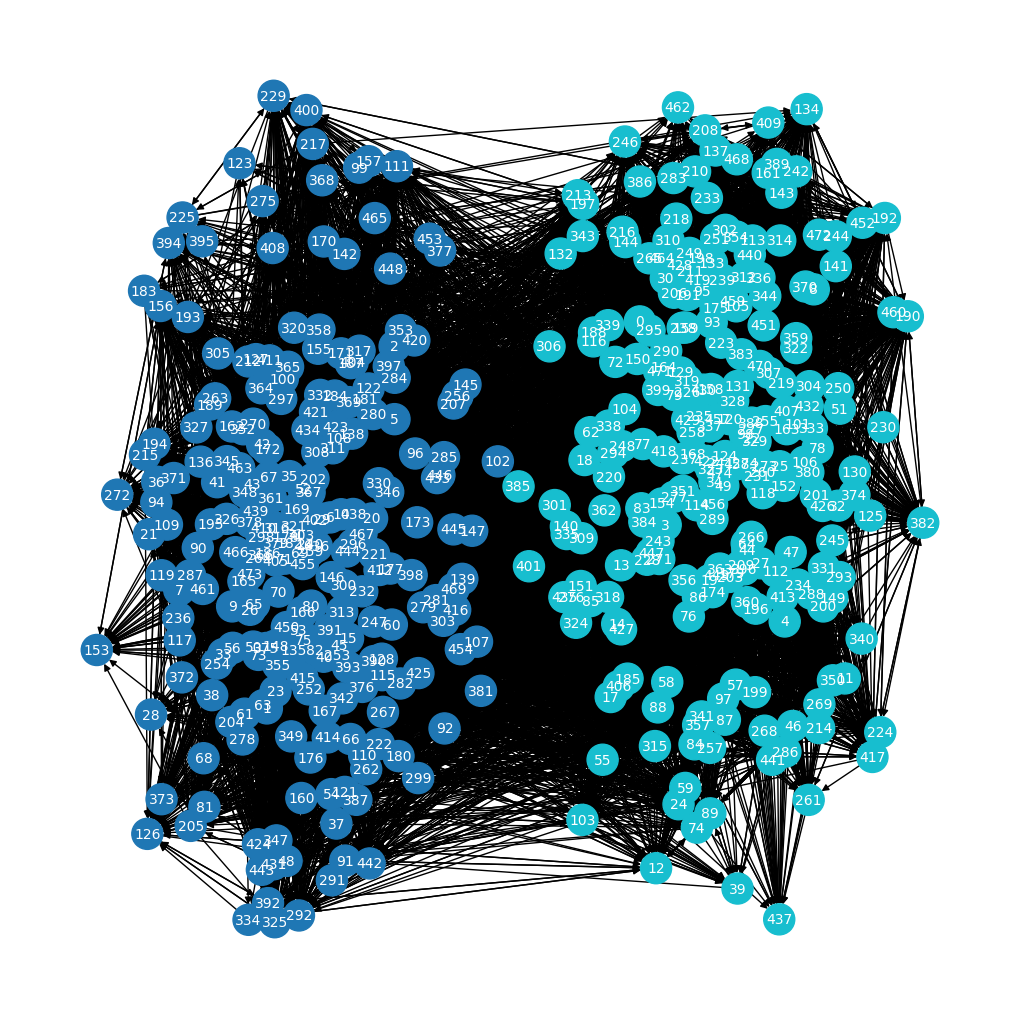

In [ ]:
def draw_colored_graph(G, num_groups):
    """Draw a graph with nodes colored based on their group attribute and positioned accordingly."""
    
    # Generate a color map with different colors for each group
    colors = plt.cm.get_cmap('tab10', num_groups)  # Use 'tab10' colormap to get distinct colors
    color_map = [colors(G.nodes[node]["color"]) for node in G.nodes()]
    
    # Create a layout that encourages nodes of the same group to be closer together
    pos = nx.spring_layout(G, k=0.3, seed=42)  # Adjust 'k' to control the spacing between groups
    
    # Adjust positions manually to separate the groups
    group_offset = 2  # Define the offset distance between groups
    group_centers = {i: (group_offset * i, 0) for i in range(num_groups)}  # Center for each group
    
    for node, (x, y) in pos.items():
        group = G.nodes[node]["color"]
        group_center_x, group_center_y = group_centers[group]
        pos[node] = (x + group_center_x, y + group_center_y)
    
    # Draw the graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, node_color=color_map, with_labels=True, node_size=500, font_color='white', font_size=10)
    
    # Display the graph
    plt.show()


draw_colored_graph(G, num_groups)